In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}
df_vendas = pd.DataFrame.from_dict(dados_vendas)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [80]:
# A variavel mes é categorica, precisamos fazer ela virar númerica, para isso usaremos o One-Hot Encoding
df_vendas['n_mes'] = range(1, 13)
df_vendas.head(10)

,mes,vendas,n_mes
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [81]:
# Modelo definindo vendas como target

# X representa apenas as variaveis independentes, ou seja, apenas a coluna n_mes
# Y representa a variável dependente, ou seja, o valor das vendas

X = df_vendas.drop(columns=['vendas', 'mes'])
Y = df_vendas['vendas']

In [82]:
# Importando o que vamos usar do scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [83]:
#  Dividindo o conjunto em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=51)

In [84]:
# Treinando o modelo
model = LinearRegression().fit(X_train, Y_train)

In [85]:
# Previsões e métricas do modelo
Y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [86]:
# Analisando as métricas
mae, r2

(np.float64(35.00000000000015), 0.966688988095238)

Apresentou uma incerteza baixa com relação ao valor de venda dos meses e o r2 mostrou que o modelo se saiu bem

In [87]:
# Mostrando os coeficientes a e b na equação linear Y = aX + b
model.coef_, model.intercept_

(array([114.16666667]), np.float64(1967.5))

In [93]:
# Prevendo as vendas de Dezembro
prev_vendas_dezembro = model.predict([[12]])
prev_vendas_dezembro

/home/rafaelsnr/.local/share/virtualenvs/modelo_diabetes-zxiYjuJl/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3337.5])

Text(0.5, 1.0, 'Scatter plot do modelo com distribuição de vendas')

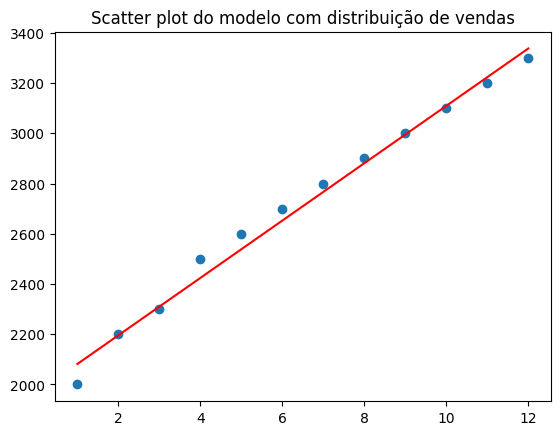

In [101]:
# Mostrando a reta com os coefs calculados
plt.scatter(data = df_vendas, x = 'n_mes', y='vendas')
plt.plot(df_vendas['n_mes'], model.predict(df_vendas[['n_mes']]), color='r')
plt.title('Scatter plot do modelo com distribuição de vendas')